# **Questão 9.1**

In [2]:
pip install --upgrade tensorflow

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from matplotlib import pyplot as plt

In [16]:
X = tf.placeholder(tf.float32, shape=[8,3])
Y = tf.placeholder(tf.float32, shape=[8,1])

# **First Layer**

In [18]:
# First layer has three neurons taking three input values 
W1 = tf.Variable(tf.random_uniform([3,3]))
# each neuron has one bias
B1 = tf.Variable(tf.zeros([3]))
# First Layer's output is Z which is the sigmoid(W1 * X + B1)
Z = tf.sigmoid(tf.matmul(X, W1) + B1)

# **Second Layer**

In [19]:
# Second layer has one neurons taking three input values.  
W2 = tf.Variable(tf.random_uniform([3,1]))
# one neuron has one bias.
B2 = tf.Variable(tf.zeros([1]))
# Second Layer's output is Y_out which is the sigmoid(W2 * Z + B2)
Y_out = tf.sigmoid(tf.matmul(Z, W2) + B2)

# **Loss Function**

In [20]:
# cross entropy
loss = tf.reduce_mean(-1*((Y*tf.log(Y_out))+((1-Y)*tf.log(1.0-Y_out))))

# **Optimizer**

In [21]:
# Gradient Descent
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

# **Train**

In [32]:
train_X = [[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
train_Y = [[0],[1],[1],[1],[1],[1],[1],[0]]

train data: [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]
Epoch :  0
Output :  [[0.6932655 ]
 [0.75084084]
 [0.7266148 ]
 [0.77461267]
 [0.7309469 ]
 [0.777753  ]
 [0.75852674]
 [0.7949935 ]]
Error :  [[-0.6932655 ]
 [ 0.24915916]
 [ 0.27338523]
 [ 0.22538733]
 [ 0.2690531 ]
 [ 0.222247  ]
 [ 0.24147326]
 [-0.7949935 ]]
Epoch :  5000
Output :  [[0.4396767 ]
 [0.7685511 ]
 [0.7639582 ]
 [0.8296753 ]
 [0.7661713 ]
 [0.82982945]
 [0.8294165 ]
 [0.8380543 ]]
Error :  [[-0.4396767 ]
 [ 0.23144889]
 [ 0.23604178]
 [ 0.17032468]
 [ 0.23382872]
 [ 0.17017055]
 [ 0.17058349]
 [-0.8380543 ]]
Epoch :  10000
Output :  [[0.17057517]
 [0.9000102 ]
 [0.9004655 ]
 [0.8268147 ]
 [0.90458494]
 [0.839559  ]
 [0.8418283 ]
 [0.6533212 ]]
Error :  [[-0.17057517]
 [ 0.09998977]
 [ 0.09953451]
 [ 0.17318529]
 [ 0.09541506]
 [ 0.16044098]
 [ 0.15817171]
 [-0.6533212 ]]
Epoch :  15000
Output :  [[0.07332256]
 [0.9828392 ]
 [0.98273605]
 [0.94886816]
 [0.9824065 ]
 [0.9

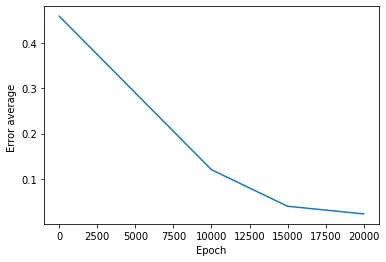

Validation: [[0.04107541]
 [0.9914405 ]
 [0.99140465]
 [0.9778832 ]
 [0.9912523 ]
 [0.9778877 ]
 [0.97789216]
 [0.06472066]]


In [49]:
# initialize
init = tf.global_variables_initializer()
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    print("train data: "+str(train_X))
    for i in range(20000):
        sess.run(train_step, feed_dict={X: train_X, Y: train_Y})
        if i % 5000 == 0:
            print('Epoch : ', i)
            print('Output : ', sess.run(Y_out, feed_dict={X: train_X, Y: train_Y}))
            print('Error : ', sess.run(Y-Y_out, feed_dict={X: train_X, Y: train_Y}))
    print('Final Output : ', sess.run(Y_out, feed_dict={X: train_X, Y: train_Y}))
    print('Error : ', sess.run(Y-Y_out, feed_dict={X: train_X, Y: train_Y}))
    plt.plot([0, 5000, 10000, 15000, 20000],[0.46, 0.29, 0.12, 0.039, 0.022])
    plt.ylabel('Error average ')
    plt.xlabel('Epoch')
    plt.show()

    print('Validation:', sess.run(Y_out, feed_dict={X: [[0,0,0],[0,0,1],[0,1,0]
                                                        ,[0,1,1],[1,0,0],[1,0,1],
                                                        [1,1,0],[1,1,1]]}))

# **Questão 9.2**

# **Questão 9.3**

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron
import pandas as pd
from sklearn.neural_network import MLPClassifier
import math
# %matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


Configurando os dados para a classificação:

In [25]:
inputs = pd.DataFrame({
'x' : [1, -1, 1, -1, 0, 0, 0, -0.25, -0.5, -0.75, -0.25,
       -0.50, -0.75, -0.25, -0.50, -0.75, 0.25, 0.50, 0.75,
       -0.25, -0.50, -0.75, 0.25, 0.50, 0.75, 0.25, 0.50, 0.75,
       0.25, 0.50, 0.75, 0, -0.25, 0.25, 0, -0.25, 0.25, 0.75, 1.00,
       1.00, -0.75,  -1.00, -1.00, -0.50, -0.50, 0.50, 0.50, -0.25, -0.25, 0.25, 0.25],
'y' : [1, 1, -1, -1, -1, 1, 0, 0.5, 0.71, 0.87, -0.5, -0.71, -0.87, -0.062, -0.25, -0.56, -0.062, -0.25, -0.56, 0.062, 0.25, 0.56, 0.062, 0.25, 0.56, -0.5, -0.71, -0.87, 0.5, 0.71, 0.87, 0.75, 0.75, 0.75, -0.75, -0.75, -0.75, 0, 0.25, -0.25, 0, -0.25, 0.25, 0.50, -0.50, 0.50, -0.50, -0.25, 0.25, -0.25, 0.25],
'Targets' : [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] 
})

Visualizando os dados:

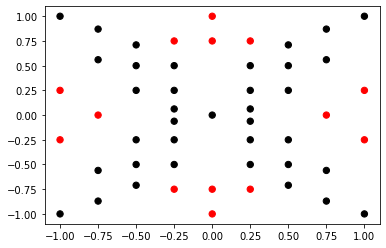

In [26]:
# Seta um arranjo de cores
colormap = np.array(['r', 'k'])
 
# Plotar os dados em seus respectivos eixos
# Configura o arranjo de cores para os Targets
plt.scatter(inputs.x, inputs.y, c=colormap[inputs.Targets], s=40)

In [30]:
# MLP
mlpc = MLPClassifier(n_iter_no_change=25, activation='logistic',
                     solver='sgd', hidden_layer_sizes=(10,50,1))
 
# Treina MLP
mlpc.fit(inputs[['x', 'y']], inputs['Targets'])

# Print the results
classif =  mlpc.predict(inputs[['x', 'y']])
print("Classification", classif)
print("Actual    ", np.array(inputs.Targets))
print("Training accuracy ", mlpc.score(inputs[['x', 'y']],
                                       inputs[['Targets']]) * 100, "%", sep='')

Classification [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Actual     [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Training accuracy 72.54901960784314%


In [ ]:
def f(x):
  return (-1)*x**2
def f1(x):
  return x**2
def f2(x):
  return -1*pow(x,0.5) 
def f3(x):
  return pow(x,0.5)  
def f4(x):
  return pow(-1*x,0.5) 
def f5(x):
  return -1*pow(-1*x,0.5)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


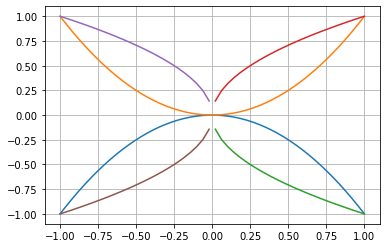

In [ ]:
x = np.linspace(-1,1)  
plt.plot(x, f(x), x, f1(x), x, f2(x), x, f3(x), x, f4(x), x, f5(x))  
plt.grid()  
plt.show()